<div style="text-align:center; font-size:29px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Lista 4
</div>

**zadanie 3**

In [7]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

In [2]:
#empiryczna autokowariancja
def empACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

In [3]:
#empiryczna autokorelacja 
def empACF(X, h):
    return empACVF(X, h)/empACVF(X, 0)

In [4]:
def teoACVF(h):
    return 4 if h==0 else 0

def teoACF(h):
    return 1 if h==0 else 0

In [5]:
def dane3(n,h):
    X = np.random.normal(0, 2, size = n)
    return n,h,empACVF(X, h), empACF(X, h)

In [10]:
results = []
for h in list(range(-50,51)):
    n = 1000
    n, h, acvf, acf = dane3(n, h)
    results.append([n, h, acvf, teoACVF(h), acf, teoACF(h)])
        
df = pd.DataFrame(results, columns = ['n', 'h', 'empACVF', 'teoACVF', 'empACF', 'teoACF'])
df

,n,h,empACVF,teoACVF,empACF,teoACF
0,1000,-50,-0.096825,0,-0.024052,0
1,1000,-49,-0.089217,0,-0.022845,0
2,1000,-48,0.066941,0,0.017196,0
3,1000,-47,-0.089341,0,-0.020875,0
4,1000,-46,0.019915,0,0.004973,0
...,...,...,...,...,...,...
96,1000,46,0.013881,0,0.003374,0
97,1000,47,-0.132234,0,-0.034856,0
98,1000,48,0.229410,0,0.059974,0
99,1000,49,-0.069376,0,-0.017478,0


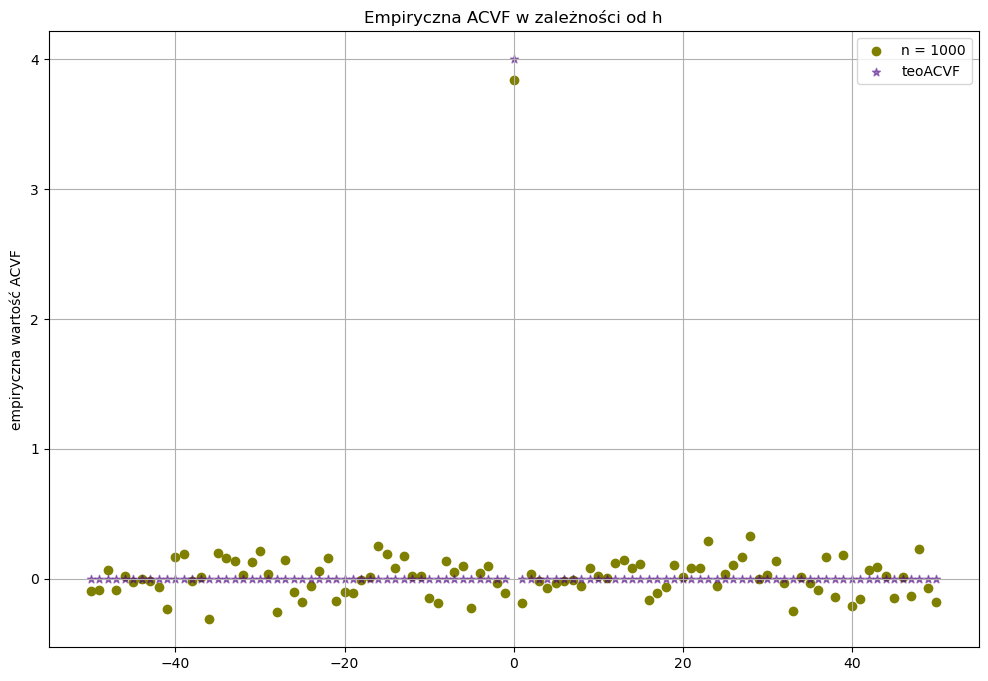

In [14]:
plt.figure(figsize=(12, 8))

for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.scatter(subset['h'], subset['empACVF'], marker='o', label=f'n = {n}', color="olive")
plt.scatter(subset['h'], subset['teoACVF'], color = 'indigo', alpha=0.5, marker='*', label = 'teoACVF')

plt.ylabel('empiryczna wartość ACVF')
plt.title('Empiryczna ACVF w zależności od h')
plt.legend()
plt.grid()
plt.show()

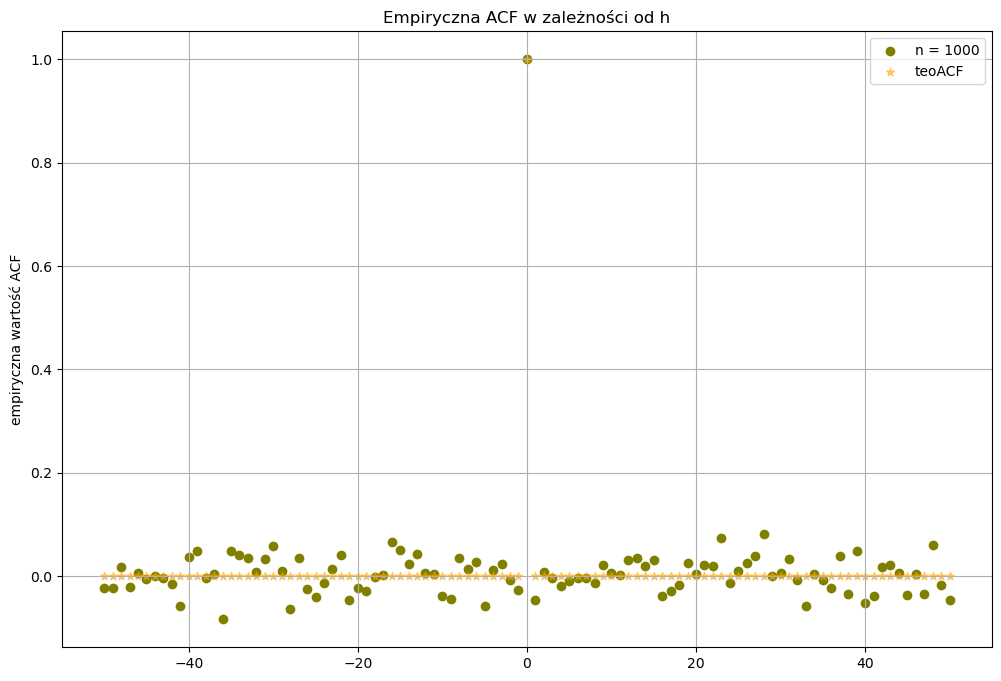

In [17]:
plt.figure(figsize=(12, 8))

for n in sorted(df['n'].unique()):
    subset = df[df['n'] == n]
    plt.scatter(subset['h'], subset['empACF'], marker='o', label=f'n = {n}', color="olive")
plt.scatter(subset['h'], subset['teoACF'], color = 'orange', alpha=0.5, marker='*', label = 'teoACF')

plt.ylabel('empiryczna wartość ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()

**zadanie 4**

In [36]:
sigma = 2
theta = 0.5

In [37]:
def MA1teoACVF(h, sigma, theta):
    if h == 0:
        return sigma**2*(1+theta**2)
    if abs(h) == 1:
        return theta*sigma**2
    else:
        return 0

In [33]:
def MA1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0

In [65]:
def dane4(n, h, sigma, theta):
    Z = np.random.normal(0, sigma**2, size = n+1)
    X = Z[1:] + theta*Z[:-1]
    return n,h, empACVF(X,h), MA1teoACVF(h, sigma, theta),empACF(X, h) , MA1teoACF(h, theta)

In [66]:
results2 = []
for h in list(range(-50,51)):
    n = 1000
    results2.append(dane4(n,h, sigma, theta))     
df2 = pd.DataFrame(results2, columns = ['n', 'h', 'empACVF','ma1teoACVF', 'empACF', 'ma1teoACF'])
df

,n,h,empACVF,teoACVF,empACF,teoACF
0,1000,-50,-0.096825,0,-0.024052,0
1,1000,-49,-0.089217,0,-0.022845,0
2,1000,-48,0.066941,0,0.017196,0
3,1000,-47,-0.089341,0,-0.020875,0
4,1000,-46,0.019915,0,0.004973,0
...,...,...,...,...,...,...
96,1000,46,0.013881,0,0.003374,0
97,1000,47,-0.132234,0,-0.034856,0
98,1000,48,0.229410,0,0.059974,0
99,1000,49,-0.069376,0,-0.017478,0


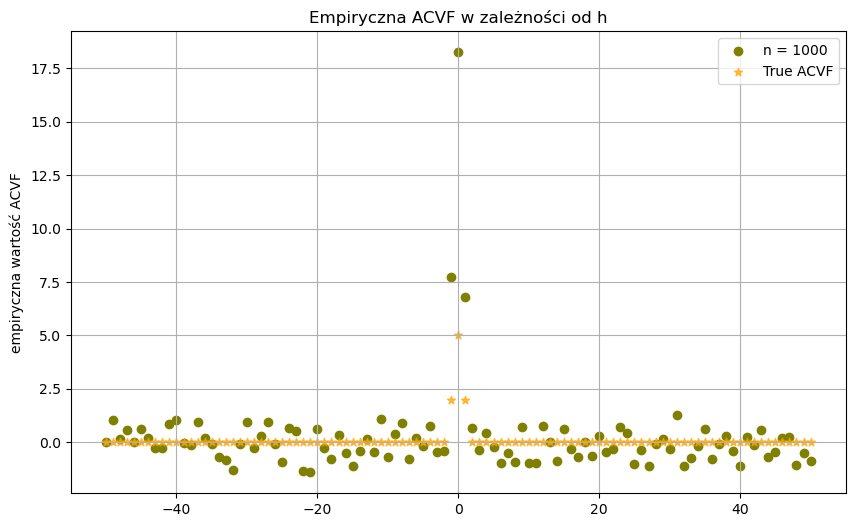

In [67]:
plt.figure(figsize=(10, 6))
for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.scatter(subset['h'], subset['empACVF'], marker='o', label=f'n = {n}', color="olive")
plt.scatter(subset['h'], subset['ma1teoACVF'], color = 'orange', alpha= 0.7, marker='*', label = 'True ACVF')
plt.ylabel('empiryczna wartość ACVF')
plt.title('Empiryczna ACVF w zależności od h')
plt.legend()
plt.grid()
plt.show()

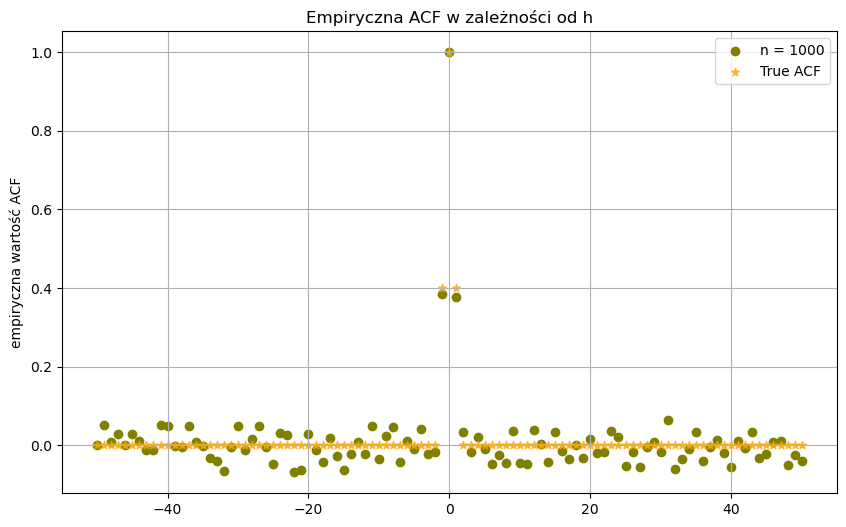

In [68]:
plt.figure(figsize=(10, 6))

for n in sorted(df2['n'].unique()):
    subset = df2[df['n'] == n]
    plt.scatter(subset['h'], subset['empACF'], marker='o', label=f'n = {n}', color="olive")
plt.scatter(subset['h'], subset['ma1teoACF'], color = 'orange', alpha= 0.7, marker='*', label = 'True ACF')
plt.ylabel('empiryczna wartość ACF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()